In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings


In [2]:
warnings.filterwarnings("ignore")
style.use('fivethirtyeight')

In [3]:
df=pd.read_csv('Covid.csv')
print(df)

           Date  Unnamed: 1 Unnamed: 2    cases deaths
0    30-01-2020         NaN        NaN      1.0    NaN
1    01-02-2020         NaN        NaN      1.0    NaN
2    02-02-2020         NaN          ?      2.0    NaN
3    03-02-2020         NaN          ?      3.0    NaN
4             ?         NaN          ?      3.0    NaN
..          ...         ...        ...      ...    ...
385         NaN         NaN          ?      NaN    NaN
386         NaN         NaN          ?      NaN    NaN
387  21-07-2020         NaN          ?  13994.0  44(+1
388         NaN         NaN          ?      NaN    NaN
389         NaN         NaN          ?      NaN    NaN

[390 rows x 5 columns]


In [4]:
df.loc[4,'Date']='05-02-2020'
print(df)

           Date  Unnamed: 1 Unnamed: 2    cases deaths
0    30-01-2020         NaN        NaN      1.0    NaN
1    01-02-2020         NaN        NaN      1.0    NaN
2    02-02-2020         NaN          ?      2.0    NaN
3    03-02-2020         NaN          ?      3.0    NaN
4    05-02-2020         NaN          ?      3.0    NaN
..          ...         ...        ...      ...    ...
385         NaN         NaN          ?      NaN    NaN
386         NaN         NaN          ?      NaN    NaN
387  21-07-2020         NaN          ?  13994.0  44(+1
388         NaN         NaN          ?      NaN    NaN
389         NaN         NaN          ?      NaN    NaN

[390 rows x 5 columns]


In [5]:
df=df[['Date','cases']]
df.dropna(inplace=True)
print(df)

           Date    cases
0    30-01-2020      1.0
1    01-02-2020      1.0
2    02-02-2020      2.0
3    03-02-2020      3.0
4    05-02-2020      3.0
..          ...      ...
375  17-07-2020  11066.0
378  18-07-2020  11659.0
381  19-07-2020  12480.0
384  20-07-2020  13274.0
387  21-07-2020  13994.0

[141 rows x 2 columns]


In [6]:
df['next_day_cases']=df['cases'].shift(+1)
df

,Date,cases,next_day_cases
0,30-01-2020,1.0,NaN
1,01-02-2020,1.0,1.0
2,02-02-2020,2.0,1.0
3,03-02-2020,3.0,2.0
4,05-02-2020,3.0,3.0
...,...,...,...
375,17-07-2020,11066.0,10275.0
378,18-07-2020,11659.0,11066.0
381,19-07-2020,12480.0,11659.0
384,20-07-2020,13274.0,12480.0


In [7]:
df['daily_cases']=df['cases']-df['next_day_cases']
df

,Date,cases,next_day_cases,daily_cases
0,30-01-2020,1.0,NaN,NaN
1,01-02-2020,1.0,1.0,0.0
2,02-02-2020,2.0,1.0,1.0
3,03-02-2020,3.0,2.0,1.0
4,05-02-2020,3.0,3.0,0.0
...,...,...,...,...
375,17-07-2020,11066.0,10275.0,791.0
378,18-07-2020,11659.0,11066.0,593.0
381,19-07-2020,12480.0,11659.0,821.0
384,20-07-2020,13274.0,12480.0,794.0


In [8]:
df=df.iloc[1:,:]
df

,Date,cases,next_day_cases,daily_cases
1,01-02-2020,1.0,1.0,0.0
2,02-02-2020,2.0,1.0,1.0
3,03-02-2020,3.0,2.0,1.0
4,05-02-2020,3.0,3.0,0.0
5,08-03-2020,8.0,3.0,5.0
...,...,...,...,...
375,17-07-2020,11066.0,10275.0,791.0
378,18-07-2020,11659.0,11066.0,593.0
381,19-07-2020,12480.0,11659.0,821.0
384,20-07-2020,13274.0,12480.0,794.0


In [9]:
df=df[['Date','cases','daily_cases']]
df

,Date,cases,daily_cases
1,01-02-2020,1.0,0.0
2,02-02-2020,2.0,1.0
3,03-02-2020,3.0,1.0
4,05-02-2020,3.0,0.0
5,08-03-2020,8.0,5.0
...,...,...,...
375,17-07-2020,11066.0,791.0
378,18-07-2020,11659.0,593.0
381,19-07-2020,12480.0,821.0
384,20-07-2020,13274.0,794.0


In [10]:
df.loc['Date']=pd.to_datetime(df.Date)
# print(df)
dt_str=dt.date(2020,1,2)
dt_stp=dt.date(2020,7,21)
no_of_days=dt_stp-dt_str
print(no_of_days)
print(len(df))

201 days, 0:00:00
141


In [11]:
days=[]

for i in range(1,len(df)+1):
    days.append(i)
print(days)
df["Days"]=days
df

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141]


,Date,cases,daily_cases,Days
1,01-02-2020,1.0,0.0,1
2,02-02-2020,2.0,1.0,2
3,03-02-2020,3.0,1.0,3
4,05-02-2020,3.0,0.0,4
5,08-03-2020,8.0,5.0,5
...,...,...,...,...
378,18-07-2020,11659.0,593.0,137
381,19-07-2020,12480.0,821.0,138
384,20-07-2020,13274.0,794.0,139
387,21-07-2020,13994.0,720.0,140


In [12]:
df=df[:-1]
# df=df.set_index(df['Days'])


df
# print(df.tail(60))

,Date,cases,daily_cases,Days
1,01-02-2020,1.0,0.0,1
2,02-02-2020,2.0,1.0,2
3,03-02-2020,3.0,1.0,3
4,05-02-2020,3.0,0.0,4
5,08-03-2020,8.0,5.0,5
...,...,...,...,...
375,17-07-2020,11066.0,791.0,136
378,18-07-2020,11659.0,593.0,137
381,19-07-2020,12480.0,821.0,138
384,20-07-2020,13274.0,794.0,139


In [13]:
df=df.set_index(df['Days'])
df

,Date,cases,daily_cases,Days
Days,,,,
1,01-02-2020,1.0,0.0,1
2,02-02-2020,2.0,1.0,2
3,03-02-2020,3.0,1.0,3
4,05-02-2020,3.0,0.0,4
5,08-03-2020,8.0,5.0,5
...,...,...,...,...
136,17-07-2020,11066.0,791.0,136
137,18-07-2020,11659.0,593.0,137
138,19-07-2020,12480.0,821.0,138


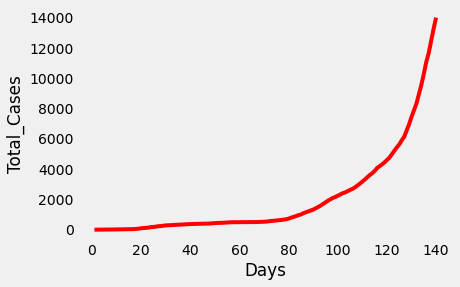

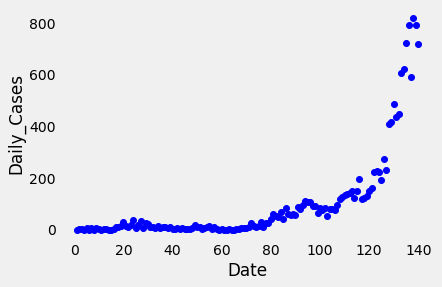

In [14]:
xs=df.index
ys=df['cases']
ys2=df['daily_cases']
#creating plots to visualize data
plt.plot(xs,ys,'r')
plt.xlabel('Days')
plt.ylabel('Total_Cases')
plt.grid()
plt.show()
plt.plot(xs,ys2,'bo')
plt.xlabel('Date')
plt.ylabel('Daily_Cases')
plt.rcParams['figure.figsize']=(8,6)
plt.grid()
plt.show()

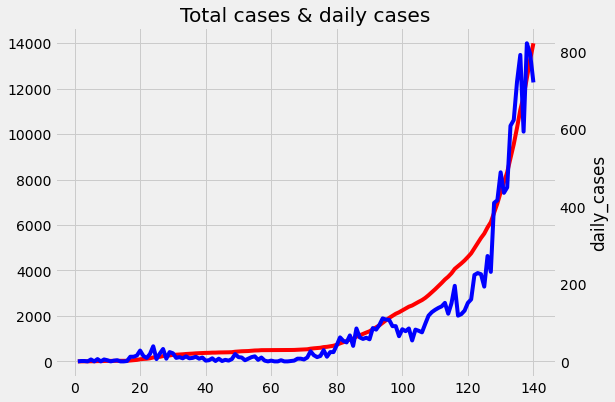

In [15]:
ax1=plt.subplot(1,1,1)
ax2=ax1.twinx()
curve1=ax1.plot(xs,ys,'r',label='Days')
plt.ylabel('days')
curve2=ax2.plot(xs,ys2,'b',label='daily_cases')
plt.xlabel("Date")
plt.ylabel("daily_cases")
plt.title("Total cases & daily cases")
plt.rcParams['figure.figsize']=(8,6)
plt.grid()
plt.show()

In [16]:
X=np.array(df['Days']).reshape(-1,1)
X.dtype

dtype('int64')

In [31]:
y=np.array(df['daily_cases'].values)
y

array([  0.,   1.,   1.,   0.,   5.,   0.,   6.,   0.,   5.,   3.,   0.,
         2.,   3.,   0.,   0.,   1.,  12.,  12.,  15.,  28.,  14.,   9.,
        19.,  39.,   6.,  20.,  32.,   7.,  24.,  21.,   9.,  11.,   8.,
        13.,   8.,   9.,  12.,   7.,  10.,   2.,   3.,   8.,   1.,   7.,
         1.,   4.,   2.,   6.,  19.,  11.,  10.,   3.,   7.,  11.,  13.,
         4.,  10.,   2.,   0.,   2.,   0.,   0.,   3.,   0.,   0.,   1.,
         2.,   7.,   7.,   5.,  10.,  26.,  16.,  11.,  14.,  29.,  12.,
        24.,  24.,  42.,  62.,  53.,  49.,  67.,  40.,  85.,  62.,  58.,
        61.,  57.,  86.,  82.,  94., 111., 108., 107.,  91.,  91.,  65.,
        83.,  78.,  85.,  54.,  82.,  79.,  75.,  97., 118., 127., 133.,
       138., 142., 151., 123., 150., 195., 118., 122., 131., 151., 160.,
       223., 228., 225., 193., 272., 231., 409., 416., 488., 435., 449.,
       608., 623., 722., 791., 593., 821., 794., 720.])

In [284]:
#split data into 85% and 15% to train and test the model.
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.22)


In [285]:
poly = PolynomialFeatures(degree=7)
x_poly=poly.fit_transform(X_train)


In [286]:
# reg=LinearRegression()     #n_jobs=2



In [287]:
# reg.fit(x_poly,y_train)


In [288]:
reg.coef_

array([ 0.00000000e+00, -1.55970843e+01,  1.68186587e+00, -7.01344305e-02,
        1.39600500e-03, -1.41752269e-05,  7.07176740e-08, -1.36527234e-10])

In [289]:
reg.intercept_

38.25747165309309

In [290]:
yp=reg.predict(x_poly)

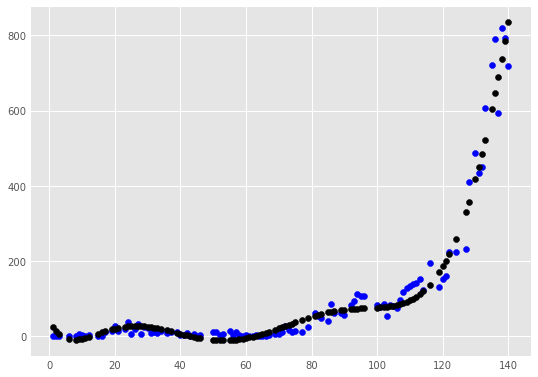

In [291]:
plt.scatter(X_train,y_train,color='b')
plt.scatter(X_train,yp,color='k')
style.use('ggplot')
plt.show()

In [292]:
reg.score(poly.fit_transform(X_test),y_test)*100

96.50502382789085

In [293]:
pred=abs(reg.predict(poly.fit_transform([[len(df)+19]])))
pred

array([1771.20867747])

In [294]:
# Model has a real world accuracy of 97% .As model predicted a value of 1569 daily cases 
# against the actual real world cases of 1530 on 17-08-2020 in kerla state

In [295]:
###This is for advanced predictions
# error_tolrnc=...       #error tolerance acquired through real world comparison
# final_prediction=pred*error_tolrnc
# final_prediction

In [296]:
import pickle
# with open ('model.pickle','wb')as f:
#     pickle.dump(reg,f)
reg=pickle.load(open('model.pickle','rb'))    

In [297]:
pred=int(abs(reg.predict(poly.fit_transform([[len(df)+49]]))))
pred

6402

In [298]:
# 

# def enlist(f,l):
#     for i in range(f,l):
#         p = int(abs(reg.predict(poly.fit_transform([[i]]))))
#         pre_daily_cases.append(p)
#         return p
   
    
# enlist()
# pre_daily_cases

In [315]:

z=int(input('Enter no.of days that need to predicted: '))
a=[]

for i in range(len(df)+1,len(df)+z):
    p = int(abs(reg.predict(poly.fit_transform([[i]]))))
    a.append(p)
  
    
print(a)

Enter no.of days that need to predicted: 60
[886, 938, 992, 1047, 1102, 1158, 1214, 1271, 1326, 1382, 1436, 1488, 1539, 1587, 1632, 1674, 1711, 1744, 1771, 1791, 1804, 1809, 1805, 1791, 1766, 1728, 1677, 1610, 1528, 1428, 1309, 1169, 1007, 821, 608, 367, 97, 205, 543, 917, 1331, 1787, 2288, 2836, 3435, 4088, 4798, 5568, 6402, 7303, 8276, 9325, 10453, 11665, 12965, 14359, 15850, 17445, 19147]


In [319]:
df2 = pd.DataFrame(data=a,columns=['predicted cases'])
df2['Dates']=pd.date_range('8/1/2020',periods=len(df2),freq='D')
df2.set_index(df2['Dates'],inplace=True)
df2=df2[['predicted cases']]
df2

,predicted cases
Dates,
2020-08-01,886
2020-08-02,938
2020-08-03,992
2020-08-04,1047
2020-08-05,1102
2020-08-06,1158
2020-08-07,1214
2020-08-08,1271
2020-08-09,1326


In [320]:
s=df2.index
s2=df2['predicted cases']
plt.plot(s1,s2,'b')
plt.xlabel('Dates')
plt.ylabel('Daily predicted cases')